In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

EDA

In [2]:
df = pd.read_csv('customer_segmentation_data.csv')
df

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [4]:
df.shape

(53503, 20)

In [5]:
df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [6]:
df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [7]:
df.tail()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5
53502,62125,20,Male,Divorced,Doctorate,Daman and Diu,Salesperson,136632,policy2,10/14/2022,Phone,policy1,743262,4499,Group,Text,In-Person Meeting,Evening,German,Segment2


In [8]:
df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [10]:
df.nunique()

Customer ID                           40259
Age                                      53
Gender                                    2
Marital Status                            5
Education Level                           5
Geographic Information                   35
Occupation                                9
Income Level                          42779
Behavioral Data                           5
Purchase History                       2016
Interactions with Customer Service        5
Insurance Products Owned                  5
Coverage Amount                       51765
Premium Amount                         4460
Policy Type                               4
Customer Preferences                      5
Preferred Communication Channel           5
Preferred Contact Time                    5
Preferred Language                        5
Segmentation Group                        5
dtype: int64

In [11]:
df.columns.tolist()

['Customer ID',
 'Age',
 'Gender',
 'Marital Status',
 'Education Level',
 'Geographic Information',
 'Occupation',
 'Income Level',
 'Behavioral Data',
 'Purchase History',
 'Interactions with Customer Service',
 'Insurance Products Owned',
 'Coverage Amount',
 'Premium Amount',
 'Policy Type',
 'Customer Preferences',
 'Preferred Communication Channel',
 'Preferred Contact Time',
 'Preferred Language',
 'Segmentation Group']

In [12]:
df.select_dtypes(include=[np.number]).corr()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
Customer ID,1.000000,-0.014102,0.010541,0.003788,-0.007172
Age,-0.014102,1.000000,-0.003447,0.006746,0.003665
Income Level,0.010541,-0.003447,1.000000,-0.018024,0.002025
Coverage Amount,0.003788,0.006746,-0.018024,1.000000,-0.001647
Premium Amount,-0.007172,0.003665,0.002025,-0.001647,1.000000


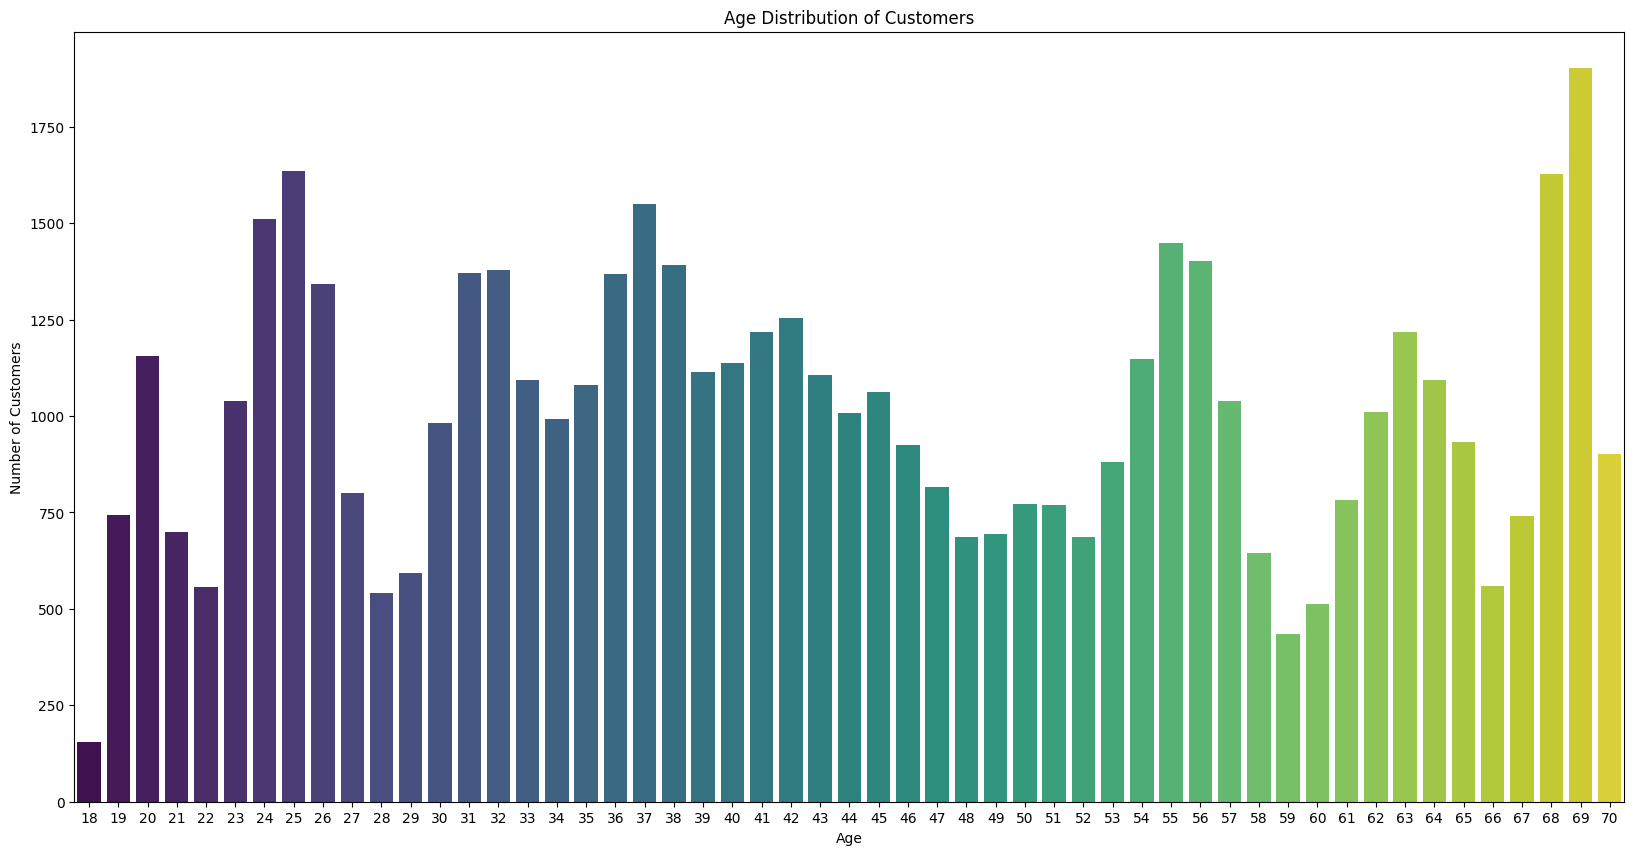

In [13]:
#plot age distribution
age_distribution = df['Age'].value_counts().sort_index()
plt.figure(figsize=(20,10))
sns.barplot(x=age_distribution.index, y=age_distribution.values, palette='viridis')
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Number of Customers')
plt.show()

In [14]:
#print age distribution
print("Age Distribution of Customers:")
for age,count in age_distribution.items():
    print(f"Age:{age},number of customers:{count}")

Age Distribution of Customers:
Age:18,number of customers:154
Age:19,number of customers:744
Age:20,number of customers:1156
Age:21,number of customers:700
Age:22,number of customers:556
Age:23,number of customers:1038
Age:24,number of customers:1511
Age:25,number of customers:1635
Age:26,number of customers:1341
Age:27,number of customers:801
Age:28,number of customers:542
Age:29,number of customers:593
Age:30,number of customers:983
Age:31,number of customers:1371
Age:32,number of customers:1379
Age:33,number of customers:1092
Age:34,number of customers:993
Age:35,number of customers:1081
Age:36,number of customers:1368
Age:37,number of customers:1550
Age:38,number of customers:1391
Age:39,number of customers:1113
Age:40,number of customers:1137
Age:41,number of customers:1217
Age:42,number of customers:1254
Age:43,number of customers:1107
Age:44,number of customers:1008
Age:45,number of customers:1061
Age:46,number of customers:926
Age:47,number of customers:816
Age:48,number of cus

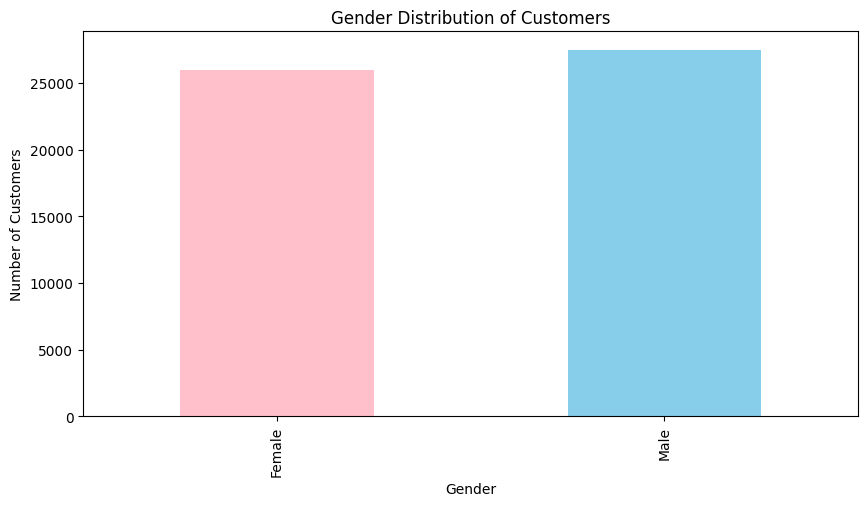

In [15]:
#gender distribution
gender_distribution =df['Gender'].value_counts().sort_index()
plt.figure(figsize=(10,5))
gender_distribution.plot(kind='bar',color=['pink','skyblue'])
plt.title('Gender Distribution of Customers')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.show()

In [16]:
#print gender distribution
print("Gender Distribution of Customers:")
for gender, count in gender_distribution.items():
	print(f"Gender: {gender}, number of customers: {count}")
    

Gender Distribution of Customers:
Gender: Female, number of customers: 26004
Gender: Male, number of customers: 27499


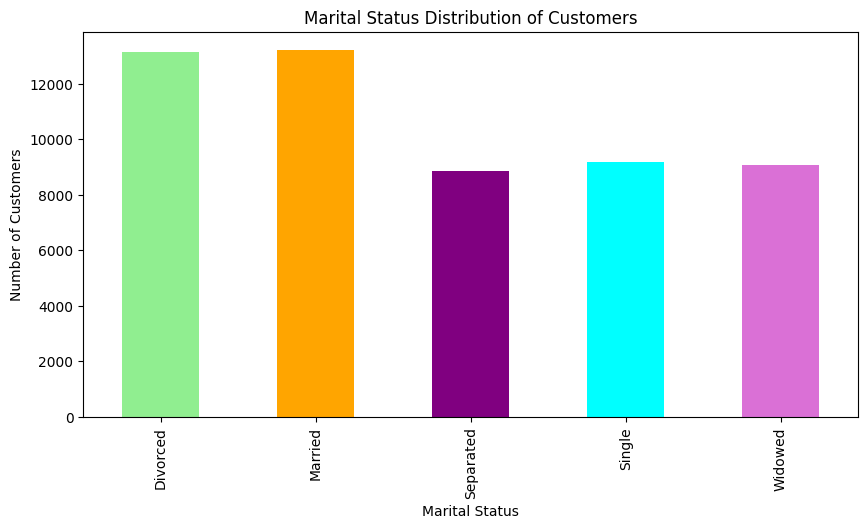

In [17]:
#plot for martial status distribution
martial_status_distribution = df['Marital Status'].value_counts().sort_index()
plt.figure(figsize=(10,5))
martial_status_distribution.plot(kind='bar',color=['lightgreen','orange','purple','cyan','orchid'])
plt.title('Marital Status Distribution of Customers')
plt.xlabel('Marital Status')
plt.ylabel('Number of Customers')
plt.show()

In [18]:
#print martial status distribution
print("Marital Status Distribution of Customers:")
for status, count in martial_status_distribution.items():
    print(f"Marital Status: {status}, number of customers: {count}")

Marital Status Distribution of Customers:
Marital Status: Divorced, number of customers: 13151
Marital Status: Married, number of customers: 13219
Marital Status: Separated, number of customers: 8861
Marital Status: Single, number of customers: 9195
Marital Status: Widowed, number of customers: 9077


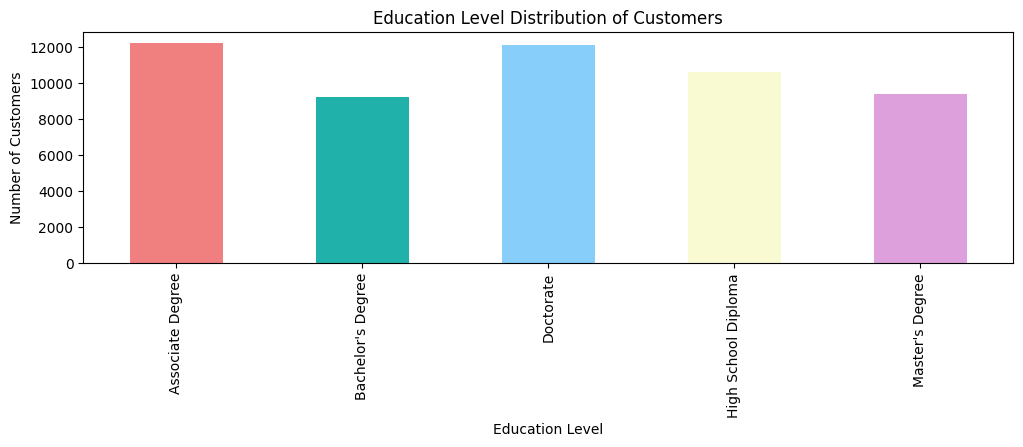

In [19]:
#plot the Education Level distribution
education_level_distribution = df['Education Level'].value_counts().sort_index()
plt.figure(figsize=(12,3))
education_level_distribution.plot(kind='bar',color=['lightcoral','lightseagreen','lightskyblue','lightgoldenrodyellow','plum'])
plt.title('Education Level Distribution of Customers')
plt.xlabel('Education Level')
plt.ylabel('Number of Customers')
plt.show()

In [20]:
#print education level distribution
print("Education Level Distribution of Customers:")
for level, count in education_level_distribution.items():
    print(f"Education Level: {level}, number of customers: {count}")

Education Level Distribution of Customers:
Education Level: Associate Degree, number of customers: 12213
Education Level: Bachelor's Degree, number of customers: 9214
Education Level: Doctorate, number of customers: 12103
Education Level: High School Diploma, number of customers: 10607
Education Level: Master's Degree, number of customers: 9366


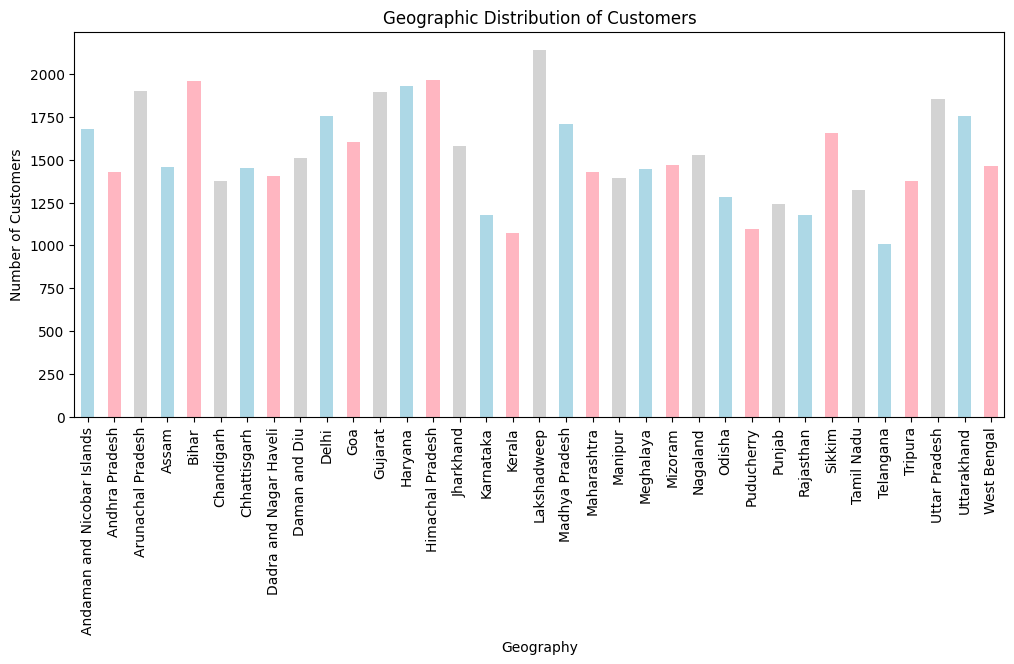

In [21]:
#Geographic Distribution
geographic_distribution = df['Geographic Information'].value_counts().sort_index()
plt.figure(figsize=(12,5))
geographic_distribution.plot(kind='bar',color=['lightblue','lightpink','lightgray'])
plt.title('Geographic Distribution of Customers')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.show()

In [22]:
#print Geographic Distribution
print("Geographic Distribution of Customers:")
for location, count in geographic_distribution.items():
    print(f"Geography: {location}, number of customers: {count}")   

Geographic Distribution of Customers:
Geography: Andaman and Nicobar Islands, number of customers: 1678
Geography: Andhra Pradesh, number of customers: 1431
Geography: Arunachal Pradesh, number of customers: 1903
Geography: Assam, number of customers: 1460
Geography: Bihar, number of customers: 1962
Geography: Chandigarh, number of customers: 1376
Geography: Chhattisgarh, number of customers: 1451
Geography: Dadra and Nagar Haveli, number of customers: 1403
Geography: Daman and Diu, number of customers: 1512
Geography: Delhi, number of customers: 1756
Geography: Goa, number of customers: 1605
Geography: Gujarat, number of customers: 1895
Geography: Haryana, number of customers: 1931
Geography: Himachal Pradesh, number of customers: 1963
Geography: Jharkhand, number of customers: 1578
Geography: Karnataka, number of customers: 1175
Geography: Kerala, number of customers: 1071
Geography: Lakshadweep, number of customers: 2140
Geography: Madhya Pradesh, number of customers: 1710
Geography

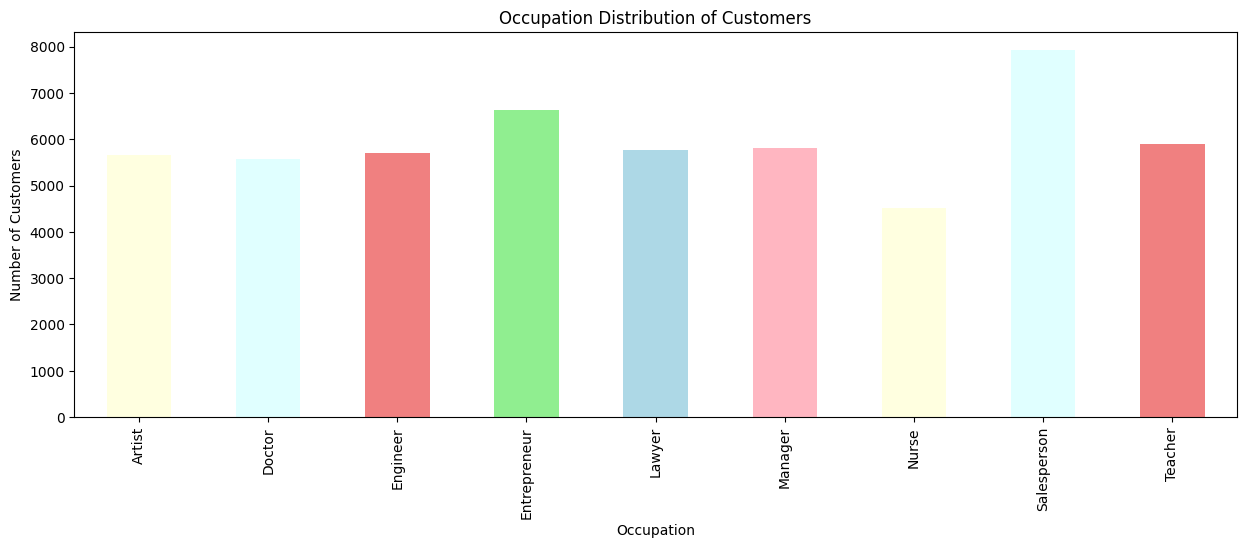

Occupation Distribution of Customers:
Occupation: Artist, number of customers: 5666
Occupation: Doctor, number of customers: 5573
Occupation: Engineer, number of customers: 5704
Occupation: Entrepreneur, number of customers: 6636
Occupation: Lawyer, number of customers: 5775
Occupation: Manager, number of customers: 5803
Occupation: Nurse, number of customers: 4521
Occupation: Salesperson, number of customers: 7919
Occupation: Teacher, number of customers: 5906


In [23]:
#plot Occupation 
occupation_distribution = df['Occupation'].value_counts().sort_index()
plt.figure(figsize=(15,5))
occupation_distribution.plot(kind='bar',color=['lightyellow','lightcyan','lightcoral','lightgreen','lightblue','lightpink'])
plt.title('Occupation Distribution of Customers')
plt.xlabel('Occupation')
plt.ylabel('Number of Customers')
plt.show()
#print Occupation Distribution
print("Occupation Distribution of Customers:")
for occupation, count in occupation_distribution.items():
    print(f"Occupation: {occupation}, number of customers: {count}")

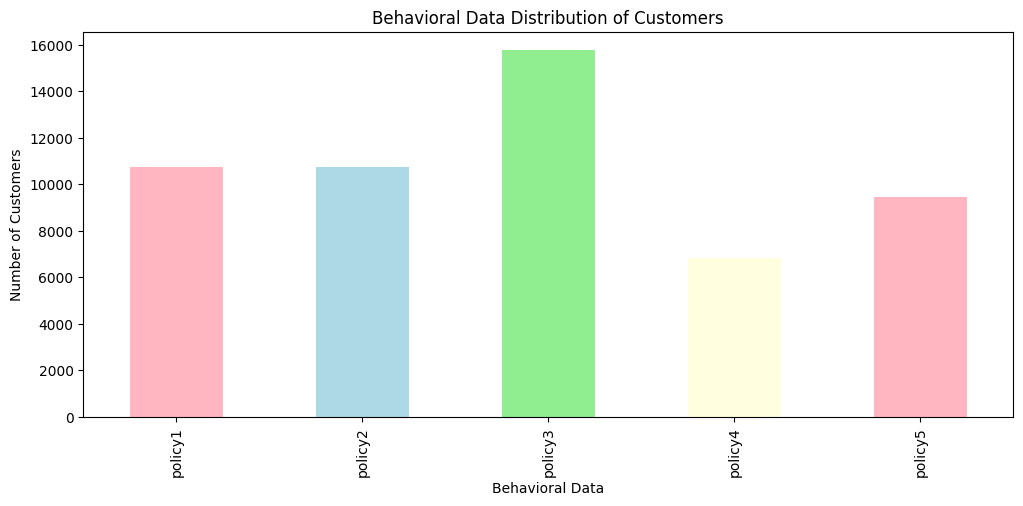

Behavioral Data Distribution of Customers:
Behavioral Data: policy1, number of customers: 10748
Behavioral Data: policy2, number of customers: 10729
Behavioral Data: policy3, number of customers: 15761
Behavioral Data: policy4, number of customers: 6815
Behavioral Data: policy5, number of customers: 9450


In [24]:
#plot Behavioral Data 
behavioral_data_distribution = df['Behavioral Data'].value_counts().sort_index()
plt.figure(figsize=(12,5))
behavioral_data_distribution.plot(kind='bar',color=['lightpink','lightblue','lightgreen','lightyellow'])
plt.title('Behavioral Data Distribution of Customers')
plt.xlabel('Behavioral Data')
plt.ylabel('Number of Customers')
plt.show()
#print Behavioral Data Distribution
print("Behavioral Data Distribution of Customers:")
for behavior, count in behavioral_data_distribution.items():
    print(f"Behavioral Data: {behavior}, number of customers: {count}")

In [ ]:
#print Income Level Distribution
print("Income Level Distribution of Customers:")
for level, count in df['Income Level'].value_counts().sort_index().items():
    print(f"Income Level: {level}, number of customers: {count}")

Income Level Distribution of Customers:
Income Level: 20001, number of customers: 25
Income Level: 20105, number of customers: 1
Income Level: 20181, number of customers: 1
Income Level: 20232, number of customers: 1
Income Level: 20243, number of customers: 1
Income Level: 20297, number of customers: 1
Income Level: 20306, number of customers: 1
Income Level: 20409, number of customers: 1
Income Level: 20426, number of customers: 1
Income Level: 20450, number of customers: 1
Income Level: 20518, number of customers: 1
Income Level: 20528, number of customers: 1
Income Level: 20529, number of customers: 1
Income Level: 20563, number of customers: 1
Income Level: 20574, number of customers: 1
Income Level: 20654, number of customers: 1
Income Level: 20655, number of customers: 1
Income Level: 20718, number of customers: 1
Income Level: 20735, number of customers: 1
Income Level: 20834, number of customers: 1
Income Level: 20846, number of customers: 1
Income Level: 20853, number of cust

In [ ]:
#print Purchase History
print("Purchase History Distribution of Customers:")
for history, count in df['Purchase History'].value_counts().sort_index().items():
    print(f"Purchase History: {history}, number of customers: {count}")

Purchase History Distribution of Customers:
Purchase History: 01-01-2018, number of customers: 26
Purchase History: 01-01-2019, number of customers: 38
Purchase History: 01-01-2020, number of customers: 31
Purchase History: 01-01-2021, number of customers: 42
Purchase History: 01-01-2022, number of customers: 8
Purchase History: 01-01-2023, number of customers: 22
Purchase History: 01-02-2018, number of customers: 27
Purchase History: 01-02-2019, number of customers: 8
Purchase History: 01-02-2020, number of customers: 25
Purchase History: 01-02-2021, number of customers: 29
Purchase History: 01-02-2022, number of customers: 36
Purchase History: 01-02-2023, number of customers: 32
Purchase History: 01-03-2018, number of customers: 23
Purchase History: 01-03-2019, number of customers: 13
Purchase History: 01-03-2020, number of customers: 24
Purchase History: 01-03-2021, number of customers: 16
Purchase History: 01-03-2022, number of customers: 18
Purchase History: 01-03-2023, number of 

In [ ]:
#Print Interactions with Customer Service
print("Customer Service Interaction Distribution of Customers:")
for interaction, count in df['Interactions with Customer Service'].value_counts().sort_index().items():
    print(f"Customer Service Interactions: {interaction}, number of customers: {count}")    

Customer Service Interaction Distribution of Customers:
Customer Service Interactions: Chat, number of customers: 14153
Customer Service Interactions: Email, number of customers: 8612
Customer Service Interactions: In-Person, number of customers: 9119
Customer Service Interactions: Mobile App, number of customers: 12419
Customer Service Interactions: Phone, number of customers: 9200


In [ ]:
#print Policy Type		
print("Policy Type Distribution of Customers:")
for policy, count in df['Policy Type'].value_counts().sort_index().items():
    print(f"Policy Type: {policy}, number of customers: {count}")

Policy Type Distribution of Customers:
Policy Type: Business, number of customers: 13986
Policy Type: Family, number of customers: 12424
Policy Type: Group, number of customers: 18255
Policy Type: Individual, number of customers: 8838


In [ ]:
#print Customer Preferences			
print("Customer Preferences Distribution of Customers:")
for preference, count in df['Customer Preferences'].value_counts().sort_index().items():
    print(f"Customer Preferences: {preference}, number of customers: {count}")

Customer Preferences Distribution of Customers:
Customer Preferences: Email, number of customers: 11318
Customer Preferences: In-Person Meeting, number of customers: 9189
Customer Preferences: Mail, number of customers: 11887
Customer Preferences: Phone, number of customers: 9959
Customer Preferences: Text, number of customers: 11150


In [ ]:
#print Preferred Communication Channel
print("Preferred Communication Channel Distribution of Customers:")
for channel, count in df['Preferred Communication Channel'].value_counts().sort_index().items():
    print(f"Preferred Communication Channel: {channel}, number of customers: {count}")

Preferred Communication Channel Distribution of Customers:
Preferred Communication Channel: Email, number of customers: 8803
Preferred Communication Channel: In-Person Meeting, number of customers: 14311
Preferred Communication Channel: Mail, number of customers: 10429
Preferred Communication Channel: Phone, number of customers: 11872
Preferred Communication Channel: Text, number of customers: 8088


In [ ]:
#print Preferred Contact Time
print("Preferred Contact Time Distribution of Customers:")
for contact_time, count in df['Preferred Contact Time'].value_counts().sort_index().items():
    print(f"Preferred Contact Time: {contact_time}, number of customers: {count}")

Preferred Contact Time Distribution of Customers:
Preferred Contact Time: Afternoon, number of customers: 9135
Preferred Contact Time: Anytime, number of customers: 7100
Preferred Contact Time: Evening, number of customers: 9408
Preferred Contact Time: Morning, number of customers: 13768
Preferred Contact Time: Weekends, number of customers: 14092


In [ ]:
#print Preferred Language
print("Preferred Language Distribution of Customers:")
for language, count in df['Preferred Language'].value_counts().sort_index().items():
    print(f"Preferred Language: {language}, number of customers: {count}")

Preferred Language Distribution of Customers:
Preferred Language: English, number of customers: 9587
Preferred Language: French, number of customers: 13362
Preferred Language: German, number of customers: 14452
Preferred Language: Mandarin, number of customers: 8358
Preferred Language: Spanish, number of customers: 7744


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

# One-hot encode the Behavioral Data column
encoder = OneHotEncoder(sparse_output=False)
behavior_encoded = encoder.fit_transform(df[['Behavioral Data']])

# Convert encoded data into a dataframe
behavior_df = pd.DataFrame(
    behavior_encoded,
    columns = encoder.get_feature_names_out(['Behavioral Data'])
)

# Combine with your original numeric feature
X = pd.concat([df[['Age']], behavior_df], axis=1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
X = pd.concat([df[['Age']], behavior_df], axis=1)

In [ ]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Determine the optimal number of clusters using the Elbow Method
wcss = []#within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


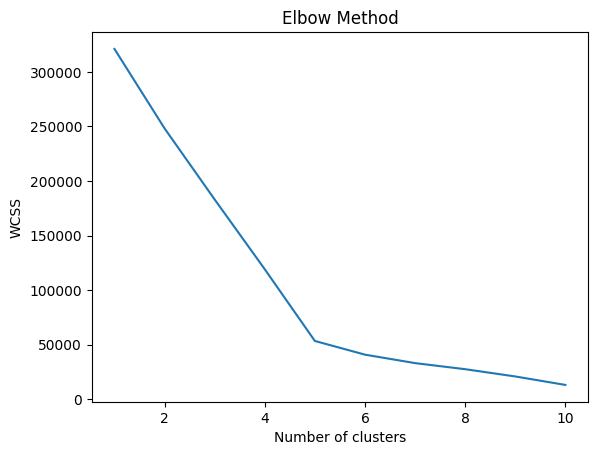

In [ ]:
#plot the Elbow Method graph
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

In [ ]:
# Apply KMeans with the chosen number of clusters
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels back into the original dataframe
df['Cluster'] = kmeans.labels_

In [ ]:
#evalautate the model (using silhouette score)
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X_scaled, df['Cluster'])
print(f"Silhouette Score for {optimal_clusters} clusters: {silhouette_avg}")

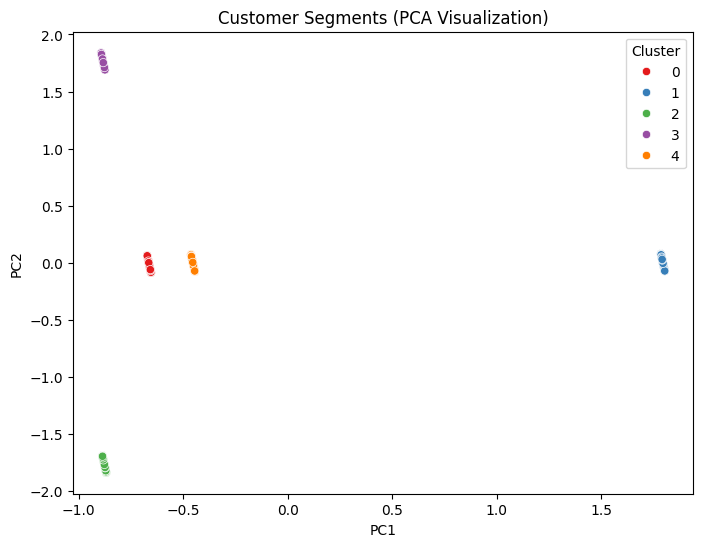

In [ ]:
from sklearn.decomposition import PCA

# Reduce to 2 components for visualization
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

df['PC1'] = pca_result[:, 0]
df['PC2'] = pca_result[:, 1]

plt.figure(figsize=(8,6))
sns.scatterplot(x='PC1', y='PC2', hue='Cluster', data=df, palette='Set1')
plt.title('Customer Segments (PCA Visualization)')
plt.legend(title='Cluster')
plt.show()



Cluster 0 Analysis:
          Customer ID          Age Gender Marital Status Education Level  \
count     9450.000000  9450.000000   9450           9450            9450   
unique            NaN          NaN      2              5               5   
top               NaN          NaN   Male        Married       Doctorate   
freq              NaN          NaN   4895           2392            2188   
mean     53272.662434    44.116402    NaN            NaN             NaN   
std      28230.984830    14.772519    NaN            NaN             NaN   
min          1.000000    18.000000    NaN            NaN             NaN   
25%      30270.750000    32.000000    NaN            NaN             NaN   
50%      58095.500000    43.000000    NaN            NaN             NaN   
75%      77006.250000    56.000000    NaN            NaN             NaN   
max     100000.000000    70.000000    NaN            NaN             NaN   

       Geographic Information   Occupation   Income Level Behavior

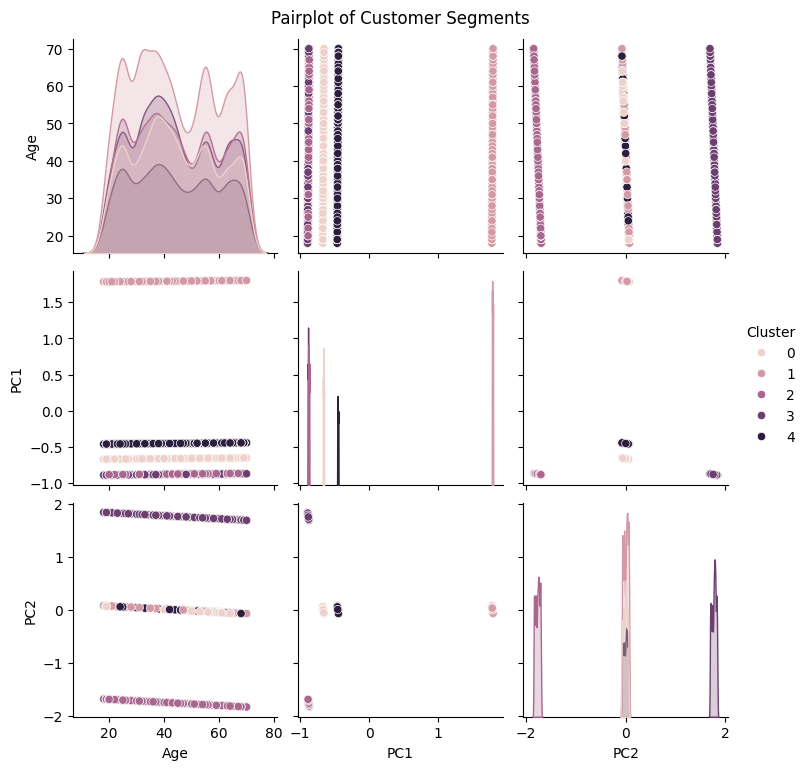

In [ ]:
for cluster in range(optimal_clusters):
    cluster_data = df[df['Cluster'] == cluster]
    print(f"\nCluster {cluster} Analysis:")
    print(cluster_data.describe(include='all'))
    
sns.pairplot(df, hue='Cluster', vars=['Age', 'PC1', 'PC2'])
plt.suptitle('Pairplot of Customer Segments', y=1.02)
plt.show()


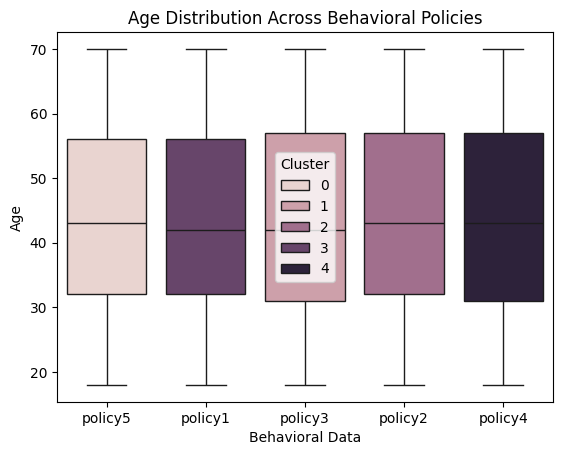

In [ ]:
sns.boxplot(x='Behavioral Data', y='Age', hue='Cluster', data=df)
plt.title('Age Distribution Across Behavioral Policies')
plt.legend(title='Cluster')
plt.show()

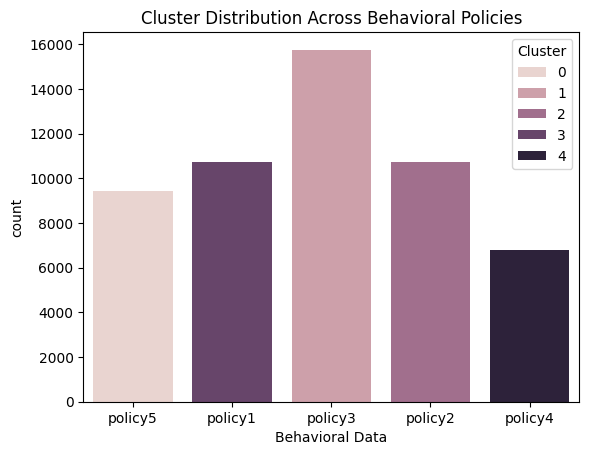

In [ ]:
sns.countplot(x='Behavioral Data', hue='Cluster', data=df)
plt.title('Cluster Distribution Across Behavioral Policies')
plt.legend(title='Cluster')
plt.show()

In [ ]:
sns.countplot(x='Income Level', hue='Cluster', data=df)
plt.title('Cluster Distribution Across Behavioral Policies')
plt.legend(title='Cluster')
plt.show()